ВАРИАНТ 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
def Fy(n):
    a, b, y0, X, Y = 1, 2, 3, [], []
    rv = sts.uniform() # Равномерная непрерывная случайная величина
    xi = rv.rvs(size = n) # Определение количества случайных переменных
    for i in range(n):
        x = xi[i] * (b - a) + a # Формула равномерного распределения из требуемого интервала
        X.append(x)
        y = np.exp(x) # Функция 11-го варианта
        Y.append(y)
    Y = sorted(Y) # Отсортированная по возрастанию выборка
    return Y

def hist2(Y, n, M):
    m = n // M # Кол-во попаданий в каждый интервал (Vi)
    A = [Y[0]]
    B = []
    for i in range(1, M): # Вычисление границ отрезков A и B
        A.append(Y[i * m])
        B.append(Y[i * m])
    B.append(Y[-1])
    d = []
    for i in range(len(A)): # Нахождение Hi
        d.append(B[i] - A[i]) # Hi = Bi - Ai
    y, x, s = [], [], A[0]
    for i in d: # Вычисление средней плотности вероятности по формуле fi = Vi / (n * Hi)
        y.append(1. /(M * i))
        x.append(s)
        s += i
        
    return (A, B, d, x, y)

def interv(n): # Нахождение параметра M и Vi
    if (n <= 100):
        M = int(np.sqrt(n))
    else:
        M = int(2 * np.log(n))
    m = n // M 
    
    return (M, m)

def teor_fy():
    Fx = np.linspace(np.exp(1), np.exp(2), 100) # Возвращает равномерно распределенные числа за указанный интервал
    fy = 1./Fx # Теоретическая протность распределения f(y)
    plt.plot(Fx, fy, label='теоретическая плот-ть распред-ия', c='r')

    plt.legend(loc='upper left')
    plt.ylabel("f(Y)")
    plt.show()

def table1(A, B, d, y, M, m): 
    print('\tAi\t\t\t', 'Bi\t\t\t', 'di\t\t', 'vi\t\t', 'fi\n')
    for i in range (M):
        x = [m] * len(d)
        print(A[i],'\t', B[i], '\t', d[i], '\t', x[i], '\t', y[i], '\n\n')
        
def pirson(A, B, n, m):
    A1, B1, p, p1, hi = [], [], [], [m / n] * len(A), []
    for i in range(len(A)):
        B1.append(np.log(B[i])) # F(Bi)
        A1.append(np.log(A[i])) # F(Ai)
        p.append(np.log(B[i]) - np.log(A[i])) # Рассчит-ем теор-ую вер-ть попадания случайной величины в i-й интервал
                                              # По формуле Pi = F(Bi) - F(Ai)
    for i in range(len(A)):
        hi.append(n * (p[i] - p1[i]) ** 2 / p[i]) # Вычисление значения критерия hi^2 
                                                  # (не суммируются сразу для того, чтобы вывести в таблицу)
    
    return (A1, B1, p, p1, hi)

def table2(A1, B1, p, p1, hi, M, m):
    print('\tAi\t\t\t', 'Bi\t\t\t', 'pi\t\t', 'pi*\t\t', 'hi\n')
    for i in range (M):
        print(A1[i],'\t', B1[i], '\t', p[i], '\t', p1[i], '\t', hi[i], '\n\n')

def empiric_f(Y): # Для построения эмпирической функции распределения используем библиотеку statsmodels
    ecdf = ECDF(Y)
    plt.step(ecdf.x, ecdf.y, label='Эмпирическая')
    plt.ylabel('$F(y)$')
    plt.legend(loc='upper left')
    
def teor_f():
    Fx = np.linspace(np.exp(1), np.exp(2), 100) # Возвращает равномерно распределенные числа за указанный интервал
    Fy = np.log(Fx) - 1 # Теоретическая функция распределения СВ Y
    plt.ylabel('$F(y)$')
    plt.legend(loc='upper left')
    return Fx, Fy

def kolmogorov(n, fun):
    f = lambda x: np.log(x) - 1 # Теоретическая функция распределения СВ Y
    d1, d2 = [], []
    alpha = 0.05 # ошибка 1-го рода
    lamb2 = 1.38 # данные из таблицы
    for i in range(n - 1): # Вычисление Dn+ и Dn-
        d1.append(abs(i / n - f(fun[i]))) 
        d2.append(abs((i - 1) / n - f(fun[i]))) 
    d = max(max(d1), max(d2)) # Нахождение Dn
    lamb = d * np.sqrt(n) # Нахождение лямбды, которую будем сравнивать с лямбдой из таблицы
    gamma = 1 - alpha # Нахождение гаммы
    print (' d: ', d, '\n', 'lambda: ', lamb, '\n', 'lambda2: ', lamb2, '\n')
    print(' 0 < lambda < lambda2 => гипотеза Н0 не противоречит имеющимся данным')
    
def mizes(fun, n):
    f = lambda x: np.log(x) - 1 # Теоретическая функция распределения СВ Y
    F, Fn, D = [], [], []
    alpha = 0.05 # ошибка 1-го рода
    omega2 = 0.461 # данные из таблицы
    for i in range(n):
        F.append(f(fun[i])) # Значения теоретической функции распределения
        Fn.append((i + 0.5) / n) # Значения эмпирической функции распределения (знак +, т.к. нумерация начинается с нуля) 
        D.append((Fn[i] - F[i])**2) # Значения квадрата отклонения 
    print('\ty\t\t', 'Fn(y)\t\t', 'F(y)\t\t\t', 'D\n')
    for i in range (n):
        print(fun[i],'\t', Fn[i], '\t', F[i], '\t', D[i], '\n\n')
    omega = 1. / (12 * n) + sum(D) # Нахождение фактического значения статистики, 
                                   #которое будет сравниваться с данными из таблицы
    print(' omega: ', omega, '\n', 'omega2: ', omega2, '\n\n')
    print(' omega < omega2 => гипотеза Н0 не противоречит имеющимся данным')
        
# Задание 1 разбила на 2 части для удобства отображения

def task1_1():
    n = 200
    M, m = interv(n)
    fun = Fy(n)
    print (fun, '\n') # выборка из 200 элементов
    A, B, d, x, y = hist2(fun, n, M)
    plt.fill_between(x, y1=y, y2=[0]*len(y), color='b', step='post', alpha=0.5)
    teor_fy() 
    return (A, B, d, y)
    
def task1_2(A, B, d, y):  
    n = 200
    M, m = interv(n)
    table1(A, B, d, y, M, m)
    A1, B1, p, p1, hi = pirson(A, B, n, m)
    table2(A1, B1, p, p1, hi, M, m)
    hi1 = sum(hi) # Вычисление параметра hi^2
    k = M - 1 # кол-во степеней свободы (т.к. распределение не зависит ни от каких параметров, то параметр S отсутствует)
    alpha = 0.01 # ошибка 1-го рода
    hiak = 21.07 # данные из таблицы
    hiak2 = 2.09 # данные из таблицы
    print(' hi: ', hi1, '\n', 'k:  ', k, '\n', 'hi1:  ', hiak, '\n', 'hi2:  ', hiak2, '\n')
    print(' hi2 < hi < hi1 => гипотеза Н0 не противоречит имеющимся данным')
    
def task2(): 
    n = 30
    M, m = interv(n)
    fun = Fy(n)
    print(fun)
    empiric_f(fun)
    x, y = teor_f()
    plt.plot(x, y, label='Теоретическая')
    plt.legend(loc='upper left')
    plt.show()
    kolmogorov(n, fun)
    
def task3():
    n = 50
    fun = Fy(n)
    mizes(fun, n)


Задание 1. В соответствии с вариантом (см. задание 1) сформировать выборку из 200 случайных чисел. Проверить гипотезу о соответствии выборке теоретическому закону распределения по критерию согласия Присона.

[2.73131977850166, 2.758527083904977, 2.7658105588258963, 2.7664009030758128, 2.7758086252383722, 2.8413171551192655, 2.880340335519079, 2.9065096742854517, 2.9177952963702545, 2.919312832610682, 2.9289096750355275, 2.9312116865162055, 2.932538332384864, 2.9330969362803954, 2.953731463075663, 2.955755298398706, 2.9621059899586095, 2.963856274523622, 2.966016473604024, 2.9775070046020136, 3.0188179680090896, 3.059770193003821, 3.075144569738406, 3.1028390164771316, 3.114794549302039, 3.1203509431707506, 3.139687362120038, 3.161315650402488, 3.162144273807229, 3.2354595734631775, 3.2442954289616956, 3.254156406997038, 3.268133714798401, 3.2766296130679238, 3.3051061613205297, 3.3074295465199715, 3.326786905970623, 3.3560666312927836, 3.3606984371162776, 3.404887243030754, 3.4184221512864044, 3.4740235964094435, 3.4788655958659724, 3.4876392428803573, 3.4888513406533477, 3.5094153110891813, 3.5132979790519685, 3.5200030485174185, 3.524743037797597, 3.5388037854965146, 3.5423724520713904, 

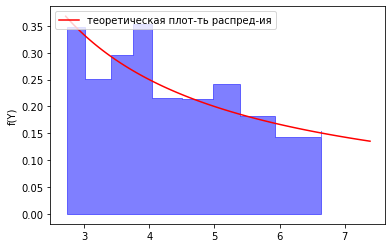

In [3]:
A, B, d, y = task1_1() # H0 - эмпирическое и теоретическое распределения согласуются

In [4]:
task1_2(A, B, d, y)

	Ai			 Bi			 di		 vi		 fi

2.73131977850166 	 3.0188179680090896 	 0.28749818950742956 	 20 	 0.3478282773583024 


3.0188179680090896 	 3.4184221512864044 	 0.39960418327731473 	 20 	 0.2502476304924031 


3.4184221512864044 	 3.757520740815228 	 0.33909858952882344 	 20 	 0.2948994867213978 


3.757520740815228 	 4.04108464503865 	 0.2835639042234219 	 20 	 0.35265419367765977 


4.04108464503865 	 4.505247906223263 	 0.4641632611846136 	 20 	 0.21544143701676247 


4.505247906223263 	 4.972570944260694 	 0.46732303803743047 	 20 	 0.21398474258825317 


4.972570944260694 	 5.38617590428239 	 0.4136049600216962 	 20 	 0.24177659763740347 


5.38617590428239 	 5.935342242976593 	 0.549166338694203 	 20 	 0.1820941906923466 


5.935342242976593 	 6.635333489451499 	 0.6999912464749061 	 20 	 0.1428589293131752 


6.635333489451499 	 7.282724691607761 	 0.6473912021562622 	 20 	 0.15446610900322796 


	Ai			 Bi			 pi		 pi*		 hi

1.0047849277282412 	 1.1048653534477948 	 0.10008042571955

Задание 2. В соответствии с вариантом (см. задание 1) сформировать выборку из 30 случайных чисел. Проверить гипотезу о соответствии выборке теоретическому закону распределения по критерию согласия Колмогорова.

[2.92760489014866, 2.96997702852008, 3.033964463750201, 3.385910719788344, 3.4058951063600658, 3.4127044958426476, 3.4329004053989802, 3.631553593036569, 3.7744546733256197, 3.807677764556816, 3.8244186549395796, 4.079523914180205, 4.273463978022387, 4.334474048626434, 4.4693005997277435, 4.551281051279777, 4.96411639149334, 5.296934464632695, 5.41435485267195, 5.4808349961998015, 5.577296342516162, 5.724300437998368, 5.987211978329195, 6.128235639968124, 6.298432413932876, 6.376094210644261, 6.488227834283379, 6.512815149025226, 6.512886300790016, 6.91922632543494]


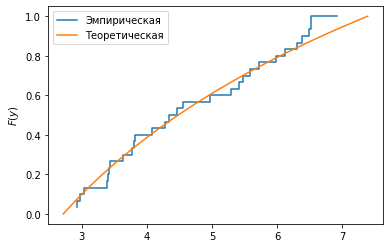

 d:  0.15295624923898377 
 lambda:  0.8377758801957381 
 lambda2:  1.38 

 0 < lambda < lambda2 => гипотеза Н0 не противоречит имеющимся данным


In [5]:
task2() # H0 - эмпирическое и теоретическое распределения согласуются

Задание 3. В соответствии с вариантом (см. задание 1) сформировать выборку из 50 случайных чисел. Проверить гипотезу о соответствии выборке теоретическому закону распределения по критерию согласия Мизеса.

In [6]:
task3() # H0 - эмпирическое и теоретическое распределения согласуются

	y		 Fn(y)		 F(y)			 D

2.7502371212784524 	 0.01 	 0.011687133880676326 	 2.846420731325958e-06 


2.7974897188823094 	 0.03 	 0.02872248608809591 	 1.6320417951084858e-06 


2.8431719696787847 	 0.05 	 0.04492031964665877 	 2.5803152492120927e-05 


2.8470101537834305 	 0.07 	 0.04626937477476378 	 0.0005631425735806178 


2.91221947029282 	 0.09 	 0.06891549504006012 	 0.0004445563494057295 


2.981833615949802 	 0.11 	 0.09253841865905788 	 0.0003049068229263382 


3.037869679645169 	 0.13 	 0.11115650649416331 	 0.0003550772475045097 


3.092612547116786 	 0.15 	 0.12901621819278075 	 0.0004403190989329853 


3.116819923020603 	 0.17 	 0.13681322658521644 	 0.0011013619296841857 


3.2333274836675012 	 0.19 	 0.1735117876645913 	 0.00027186114601752373 


3.251552479552981 	 0.21 	 0.17913256830230329 	 0.0009527983396119714 


3.4022499950294867 	 0.23 	 0.22443697599734103 	 3.0947236054159984e-05 


3.492829759137057 	 0.25 	 0.2507122269149744 	 5.072671784139683e-07 


3.5298